# Data visualize Supply amount by zip code
- We have to check supply amount by GPCFB as well.

In [2]:
# to read and visualize spatial data
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt 
from mpl_toolkits.axes_grid1 import make_axes_locatable

Duplicate key in file PosixPath('/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc'), line 768 ('font.family: IPAexGothic')


## Preparing to draw the boundary

In [3]:
# df_bound is for boundary plotting
path = "./geo_data/tl_2021_us_county/tl_2021_us_county.shp" # from https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2021&layergroup=Counties+%28and+equivalent%29
df_bound = gpd.read_file(path)
df_bound = df_bound.to_crs("EPSG:4326")

# All US -> Only PA
df_bound = df_bound[df_bound["STATEFP"] == "42"]
# All PA -> Only the 11 counties
df_bound = df_bound[df_bound["NAME"].isin(["Allegheny", "Armstrong", "Beaver", "Butler", "Cambria", 
                                           "Fayette", "Greene", "Indiana", "Lawrence", "Somerset", "Washington"])]

## Import geo data
You need to select the geo-data for your regional unit.  
(e.g.) If you have data by **zip code**, you have to select geo-data for zip code.

Zip code data is large, so it may take some time to load.

In [4]:
# Geodata of PA by Zipcode
path = "./geo_data/tl_2021_us_zcta520/tl_2021_us_zcta520.shp"
df_geo = gpd.read_file(path)
df_geo = df_geo.to_crs("EPSG:4326")

In [5]:
# check
df_geo.head()

,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,47236,47236,B5,G6350,S,1029067,0,+39.1517426,-085.7252769,"POLYGON ((-85.73410 39.15597, -85.72749 39.156..."
1,47870,47870,B5,G6350,S,8830,0,+39.3701518,-087.4735141,"POLYGON ((-87.47414 39.37016, -87.47409 39.370..."
2,47851,47851,B5,G6350,S,53547,0,+39.5735818,-087.2459626,"POLYGON ((-87.24770 39.57431, -87.24770 39.574..."
3,47337,47337,B5,G6350,S,303089,0,+39.8027537,-085.4372850,"POLYGON ((-85.44357 39.80328, -85.44346 39.803..."
4,47435,47435,B5,G6350,S,13302,0,+39.2657557,-086.2951577,"POLYGON ((-86.29592 39.26547, -86.29592 39.266..."


## Import data to be visualized
I made this data with "GPCFB_DistirbutePounds_Dataset.csv".   


In [6]:
# Read Supply data
df = gpd.read_file("./data/Ryo_GPCFB_DistirbutePounds_Dataset.csv") 

In [7]:
df.head()

,OrderID,OrderRef,AgencyID,AgencyRef,City,Zip,AgencyGroup,County,PickUpDate,OrderWeight,...,ProductQuantity,FAType,Storage,ShipViaID,ProductName,SumPCost,QPRGroup,A2HProdCatRef,field_22,geometry
0,134576,434282,926,GPCF2078-1,NULL,NULL,LC-DIST,LAWRENCE,1/3/2019 8:00,10760,...,40,06-Meals/Entrees/Soups,DRY,DEL NO FEE,Soup Chicken & Rice EZO,254,2 Purchased,OTHER,,None
1,134576,434282,926,GPCF2078-1,NULL,NULL,LC-DIST,LAWRENCE,1/3/2019 8:00,10760,...,16,24-Rice,DRY,DEL NO FEE,Rice White Long Grain,207.84,2 Purchased,OTHER,,None
2,134576,434282,926,GPCF2078-1,NULL,NULL,LC-DIST,LAWRENCE,1/3/2019 8:00,10760,...,24,21-Pasta,DRY,DEL NO FEE,Pasta Spaghetti,178.8,2 Purchased,OTHER,,None
3,134576,434282,926,GPCF2078-1,NULL,NULL,LC-DIST,LAWRENCE,1/3/2019 8:00,10760,...,20,06-Meals/Entrees/Soups,DRY,DEL NO FEE,Meal Ravioli w/Beef EZO,251.4,2 Purchased,OTHER,,None
4,134576,434282,926,GPCF2078-1,NULL,NULL,LC-DIST,LAWRENCE,1/3/2019 8:00,10760,...,20,27-Vegetables Canned/Frozen,DRY,DEL NO FEE,Vegetable Peas Sweet,203.8,2 Purchased,OTHER,,None


In [8]:
# Checked rows with NULL zipcode
df[df["Zip"]=="NULL"].shape

(3712, 23)

In [9]:
df.shape

(491870, 23)

In [10]:
# cheked the percentage of rows deleted
# -> 0.75%
3712 / 491870

0.0075467094964116535

In [11]:
# Eliminate rows has "NULL" zipcode
df = df[df["Zip"]!="NULL"]

In [12]:
# merge, key=Zipcode
df_ = pd.merge(df, df_geo[["ZCTA5CE20", "geometry"]], left_on="Zip", right_on="ZCTA5CE20")

In [13]:
df_.head()

,OrderID,OrderRef,AgencyID,AgencyRef,City,Zip,AgencyGroup,County,PickUpDate,OrderWeight,...,Storage,ShipViaID,ProductName,SumPCost,QPRGroup,A2HProdCatRef,field_22,geometry_x,ZCTA5CE20,geometry_y
0,134695,434401,1198,PSAL1406-2,Beaver Falls,15010,SFPP,BEAVER,1/2/2019 9:00,2920,...,DRY,DEL,Baking Meal Pancake Mix,178.8,2 Purchased,OTHER,,None,15010,"POLYGON ((-80.48277 40.73086, -80.48275 40.731..."
1,134695,434401,1198,PSAL1406-2,Beaver Falls,15010,SFPP,BEAVER,1/2/2019 9:00,2920,...,DRY,DEL,Vegetable Tomatoes Diced LS,316.5,2 Purchased,OTHER,,None,15010,"POLYGON ((-80.48277 40.73086, -80.48275 40.731..."
2,134695,434401,1198,PSAL1406-2,Beaver Falls,15010,SFPP,BEAVER,1/2/2019 9:00,2920,...,DRY,DEL,Dairy Milk 1% Shelf Stable,450.9,2 Purchased,OTHER,,None,15010,"POLYGON ((-80.48277 40.73086, -80.48275 40.731..."
3,134695,434401,1198,PSAL1406-2,Beaver Falls,15010,SFPP,BEAVER,1/2/2019 9:00,2920,...,DRY,DEL,Juice Apple Juice,424.2,2 Purchased,OTHER,,None,15010,"POLYGON ((-80.48277 40.73086, -80.48275 40.731..."
4,134913,434619,1197,PSAL1406-1,Beaver Falls,15010,PROG-FP,BEAVER,1/2/2019 9:00,1885,...,REFRIGERATED,DEL,Dairy Cheese CSFP American (100035),0,3 Federal-USDA,CSFP,,None,15010,"POLYGON ((-80.48277 40.73086, -80.48275 40.731..."


In [14]:
# corrected data type
df_ = df_.astype({'ProductWeight': float})
df_ = df_.astype({'Zip': int})

In [15]:
df_.describe()

,Zip,ProductWeight
count,462832.000000,462832.000000
mean,15295.015956,216.803871
std,375.715406,857.400002
min,15001.000000,-42654.000000
25%,15131.000000,26.000000
50%,15210.000000,67.500000
75%,15228.000000,168.000000
max,44307.000000,110110.000000


In [16]:
# deleated the poviders' data from other area
df_ = df_[df_["County"].isin(["ALLEGHENY",
"ARMSTRONG",
"BEAVER",
"BUTLER",
"CAMBRIA",
"FAYETTE",
"GREENE",
"INDIANA",
"LAWRENCE",
"SOMERSET",
"WASHINGTON"])]

In [17]:
# group zy zip
df_ = df_.groupby('Zip').sum()

In [20]:
# add geo-data
df_geo = df_geo.astype({'ZCTA5CE20': int})
df_ = pd.merge(df_, df_geo[["ZCTA5CE20", "geometry"]], left_on="Zip", right_on="ZCTA5CE20")

In [21]:
# Rename a column name
df_ = df_.rename(columns={'ZCTA5CE20': 'zipcode'})

In [22]:
# pandas -> geopandas 
gdf = gpd.GeoDataFrame(df_, geometry='geometry') 

## Visualize the data

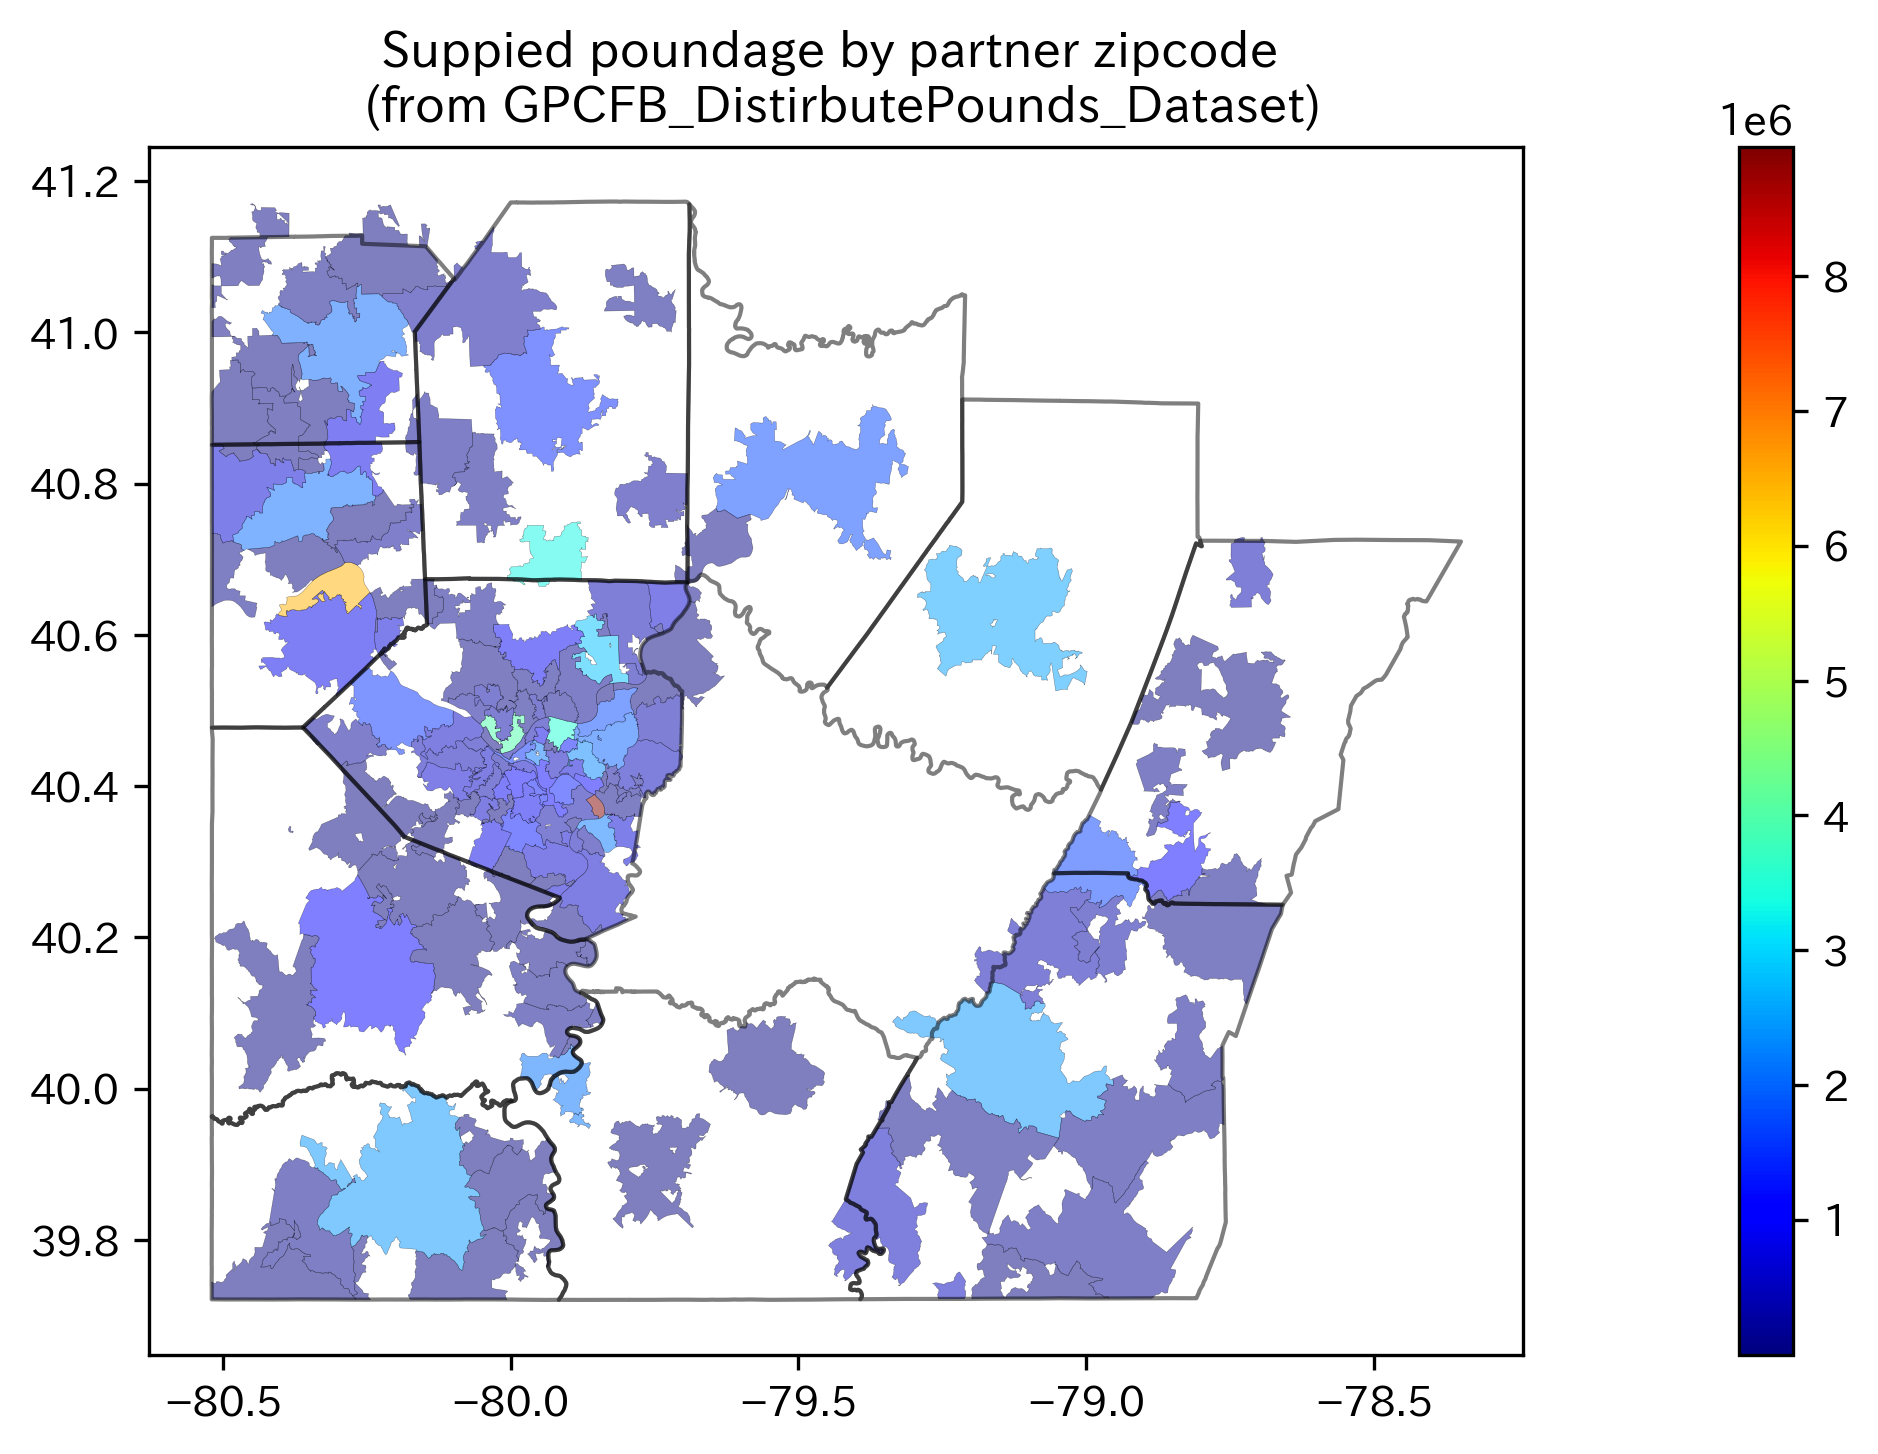

In [23]:
# Plot
# need the following 2 geo dataframes
# df_bound: for boundary plot
# gdf: data for visualization and geodata


# Specify the data column name that you want to visualize in color.
data = "ProductWeight"

f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('Suppied poundage by partner zipcode \n (from GPCFB_DistirbutePounds_Dataset)')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
gdf.plot(data, ax=ax, alpha=0.5, cmap='jet', edgecolor='k', legend=True, cax=cax, linewidth=0.1)
df_bound.boundary.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)
plt.show()

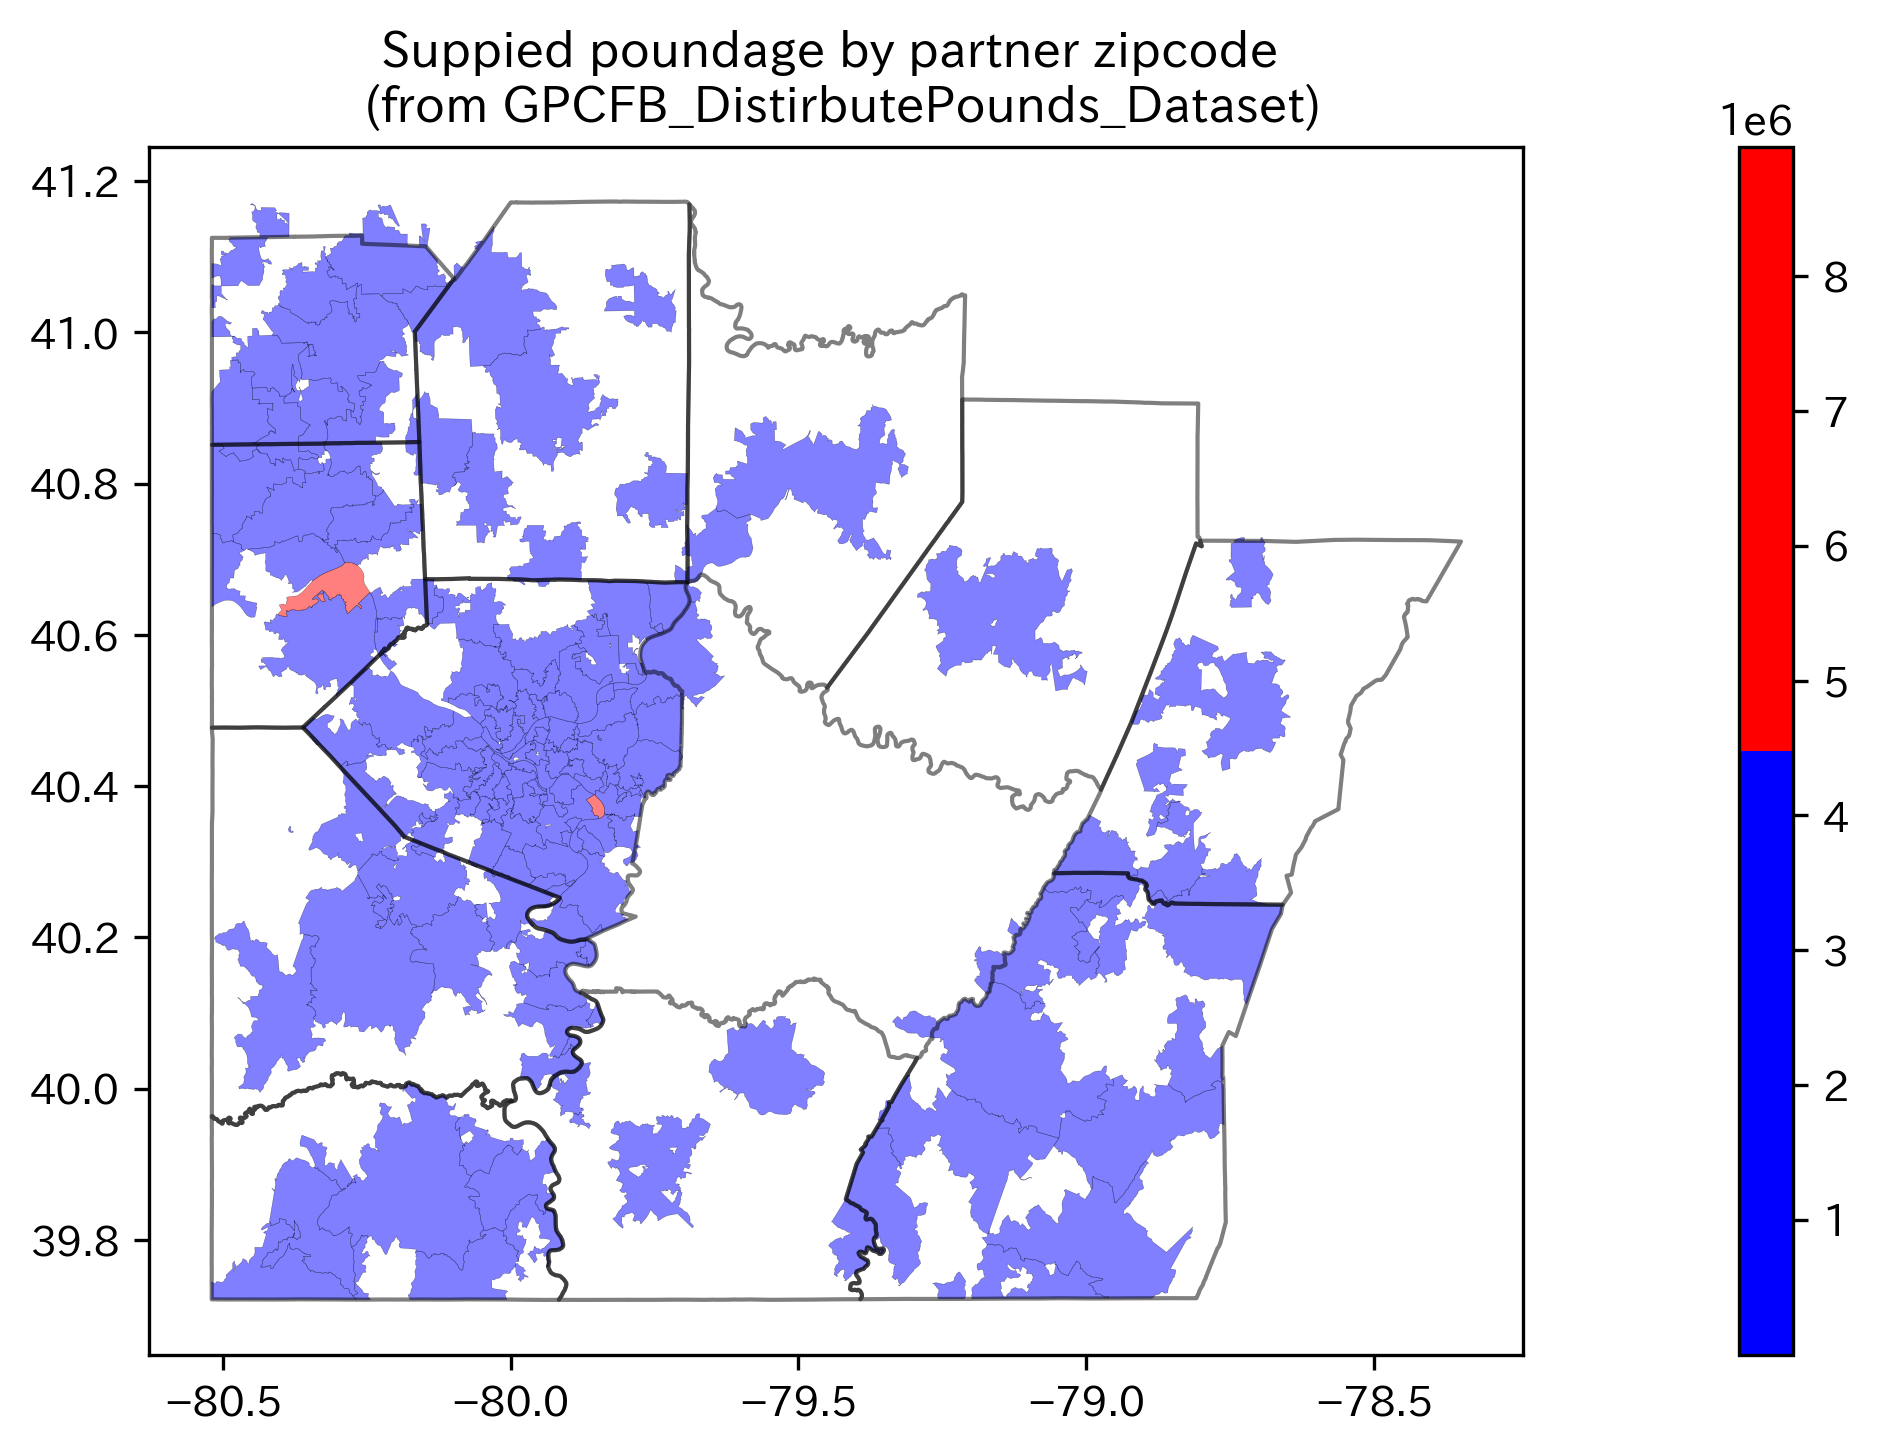

In [24]:
# Bicolor mapping
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["blue","red"])

# Plot
# need the following 2 geo dataframes
# df_bound: for boundary plot
# gdf: data for visualization and geodata

# Specify the data column name that you want to visualize in color.
data = "ProductWeight"

f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
plt.title('Suppied poundage by partner zipcode \n (from GPCFB_DistirbutePounds_Dataset)')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%",pad=0,alpha=0.5)
gdf.plot(data, ax=ax, alpha=0.5, cmap=cmap, edgecolor='k', legend=True, cax=cax, linewidth=0.1)
df_bound.boundary.plot(ax=ax, alpha=0.5, edgecolor='black', linewidth=1)
plt.show()